In [2]:
import os
from os.path import expanduser
import socket
import sys


# BELOW IS SYSTEM/PATH CONFIGURATION #
my_home = expanduser("~")
running_system = socket.gethostname()
# Configure machine's names here #
systemHLRN = 'blogin1'
systemLOCAL = 'Laurents-MacBook-Pro.local'
my_home = expanduser("~")
# Define local pass #
if running_system == systemLOCAL:
    print "computer = ", running_system
    wd_path = os.path.join(my_home,"Documents","projects", "awi-models")
elif running_system[0:1] == "b" or running_system == systemHLRN:
    print "computer = ", running_system
    wd_path = os.path.join(my_home,"awi-models")
else:
    print 'please configure your local machine : type socket.gethostname()'
print "working directory set to", wd_path
os.chdir(wd_path)
sys.path.append("codes/modules")
#########################################

 computer =  bfn1001
working directory set to /home/hbkoziel/awi-models


In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from pylab import *
from load_mesh_data_new import *
import numpy as np
import datetime as dt
from PiecewiseNorm import PiecewiseNorm
from netCDF4 import Dataset
import colormaps as cmaps
from matplotlib.colors import ListedColormap
from scipy.stats import linregress

In [4]:
# PLOT CONFIGURATION #

# load colormaps #
cmap = plt.get_cmap('RdBu_r')
# figure export 
export_plot = False
# figure export definition
dpicnt=200
# type of plot
global_plot = False
arctic_plot = True
# choose simulation
runid='Arc12'
# choose date
first_year = 1990
last_year  = 2015
years      = np.arange(first_year,last_year+1,1)
months =np.linspace(0,11,12).astype(int)
# choose depth
depth = 0
# re-sampling data (D = daily, M = monthly, Y = yearly) (sum, mean, min, max)
sampling_period = 'M' 
sampling_method = 'mean'

########################

# AUTOMATIC DEFINITION OF PATHS
resultpath = '/scratch/usr/hbkvsk12/hlrn3_work2/results/'+runid+'/Oldfiles/'
savepath    = wd_path+'/figures/'+runid+'/'
meshpath    = wd_path+'/data/mesh/meshArc4.5/'

# Create figure directory if it does not exist
if os.path.exists(savepath) == False:
    try:
        os.mkdir(savepath)
        print ("Creation of the directory %s successfull" % savepath)
    except OSError:
        print ("Creation of the directory %s failed" % savepath)
else:
    print ("directory %s already existing" % savepath)

directory /home/hbkoziel/awi-models/figures/Arc12/ already existing


In [5]:
if depth == 0:
    print 'ploting surface only'
    get3d = False
else:
    get3d = True

mesh = fesom_mesh(meshpath, get3d = get3d)

# Here we select only North Polar latitudes if we only want to plot the Arctic (faster)
if (global_plot == False and arctic_plot == True):
    Arc_ind   = np.nonzero((mesh.y2 >= 65))
    lon = mesh.x2[Arc_ind]
    lat = mesh.y2[Arc_ind]
    print 'ploting the Arctic only'
elif global_plot == True:
    Arc_ind   = np.nonzero((mesh.y2 >= 65))
    lon = mesh.x2[Arc_ind]
    lat = mesh.y2[Arc_ind]
    print 'ploting the Global also'
else:
    print 'cannot define both Global and Arctic plots = False'
    
#ind_max = np.max(np.where(ind_lat)[0])
#ind_lat_full = np.zeros(mesh.x2.shape, dtype=bool)
#ind_lat_full[ind_lat] = True
#ind_lat[-1]
#print ind_max
#plt.plot(lon,lat,'.')

ploting surface only
Load 2d part of the grid in 3 second(s)
ploting the Arctic only


In [210]:
#plt.plot(ind_lat[0])
type(Arc_ind)

tuple

565786
0
565787
565787
50624
725908


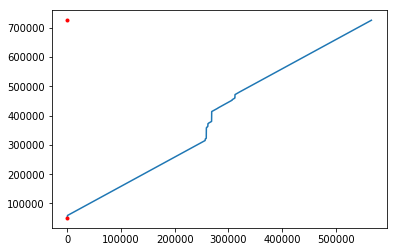

In [125]:
ind_max = np.max(np.where(ind_lat[0]))
print ind_max
ind_min = np.min(np.where(ind_lat[0]))
print ind_min

print len(ind_lat[0])
print len(np.arange(ind_min,ind_max+1,1))

plt.plot(ind_lat[0])
plt.plot(np.min(ind_lat[0]),'.r')
print np.min(ind_lat[0])
plt.plot(np.max(ind_lat[0]),'.r')
print np.max(ind_lat[0])

In [ ]:
# loop over years
for ind in range(0,len(years)):
    
    print years[ind]
    ncfile = resultpath+runid+'.'+str(years[ind])+'.oce.mean.nc'
    f      = Dataset(ncfile, 'r')
    date    = f.variables['time'][:]
    ts_epoch = (datetime.datetime(years[ind],1,1)-datetime.datetime(1970,1,1)).total_seconds()
    date_timestamp = pd.to_datetime(date[:]+ts_epoch, unit='s')
    u    = f.variables['u'][:,Arc_ind[0]]
    v    = f.variables['v'][:,Arc_ind[0]]
     
    #u = u[:,Arc_ind[0]]
    #v = v[:,Arc_ind[0]]
    vspeed = sqrt(u*u+v*v)
            
    # Panda dataframe creation #
    
    df=pd.DataFrame(index = date_timestamp, data = vspeed)
    
    if sampling_method =='mean':
        df_resampled = df.resample(sampling_period).mean()
    elif sampling_method =='sum':
        df_resampled = df.resample(sampling_period).sum()
    elif sampling_method =='max':
        df_resampled = df.resample(sampling_period).max()
    elif sampling_method =='min':
        df_resampled = df.resample(sampling_period).min()
    
    if ind == 0:
        dff=df_resampled;
    else:
        dff = pd.concat([dff, df_resampled])
       
     #nc_attrs, nc_dims, nc_vars = ncdump(nc_file)


1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012


In [214]:
v.shape

(12, 1, 565787)

In [128]:
#df2 = pd.DataFrame(pd.np.random.rand(100, 10))
#df2
# df2.apply(lambda x: linregress(df2.index, x), result_type='expand').rename(index={0: 'slope', 1: 
#                                                                                   'intercept', 2: 'rvalue', 3:
#                                                                                   'p-value', 4:'stderr'})
#dff.index.date
#xx = date_timestamp/(3600*24)
#xx[1:10]
date_day=pd.to_numeric(dff.index)
date_day = date_day /(3600*24)
#len(dff.index)
#date_vec=np.arange(0,len(dff.index),1)
dff

,0,1,2,3,4,5,6,7,8,9,...,565777,565778,565779,565780,565781,565782,565783,565784,565785,565786
1990-02-28,0.0,0.0,0.0,0.0,0.0,0.0,0.073677,0.0,0.051281,0.0,...,0.082396,0.073438,0.068810,0.072521,0.090220,0.082282,0.093057,0.100413,0.104435,0.095156
1990-03-31,0.0,0.0,0.0,0.0,0.0,0.0,0.098692,0.0,0.047828,0.0,...,0.122567,0.113284,0.115934,0.121348,0.136082,0.128316,0.143300,0.150271,0.151978,0.133672
1990-04-30,0.0,0.0,0.0,0.0,0.0,0.0,0.117654,0.0,0.092933,0.0,...,0.094679,0.083068,0.090744,0.088875,0.107666,0.104323,0.117063,0.125573,0.139828,0.114453
1990-05-31,0.0,0.0,0.0,0.0,0.0,0.0,0.062925,0.0,0.056733,0.0,...,0.040086,0.037625,0.036083,0.036954,0.051024,0.043865,0.059197,0.068219,0.069313,0.055322
1990-06-30,0.0,0.0,0.0,0.0,0.0,0.0,0.083868,0.0,0.063030,0.0,...,0.042682,0.033191,0.035615,0.037287,0.049583,0.044204,0.053307,0.057730,0.061663,0.053207
1990-07-31,0.0,0.0,0.0,0.0,0.0,0.0,0.029933,0.0,0.006680,0.0,...,0.028573,0.016415,0.022014,0.023209,0.043849,0.039329,0.058078,0.061334,0.064297,0.044508
1990-08-31,0.0,0.0,0.0,0.0,0.0,0.0,0.063414,0.0,0.036358,0.0,...,0.035457,0.021811,0.025070,0.027425,0.047540,0.042974,0.052619,0.058443,0.057680,0.044697
1990-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.055444,0.0,0.030494,0.0,...,0.025074,0.023408,0.024830,0.028529,0.030797,0.028857,0.026612,0.031185,0.031814,0.022889
1990-10-31,0.0,0.0,0.0,0.0,0.0,0.0,0.032108,0.0,0.010401,0.0,...,0.029196,0.028373,0.033642,0.033945,0.032384,0.039203,0.047571,0.038441,0.033959,0.027401
1990-11-30,0.0,0.0,0.0,0.0,0.0,0.0,0.037659,0.0,0.011677,0.0,...,0.024246,0.020079,0.025263,0.023935,0.026599,0.026030,0.030088,0.031163,0.036348,0.029525


In [129]:
#df = df.set_index('Id')
#fit_df=pd.DataFrame(index = date_timestamp, data = vspeed)
#fit_df = df.apply(lambda x: np.polyfit(x.x, x.y, 1))

# dff.apply(lambda x: linregress(date_vec, x),result_type='expand').rename(index={0: 'slope', 1: 
#                                                                                   'intercept', 2: 'rvalue', 3:
#                                                                                   'p-value', 4:'stderr'})
# dff

In [130]:
arr = dff.to_numpy()
arr.shape

(310, 565787)

In [131]:
#dff = dff.apply(lambda x: np.ma.polyfit(date_vec, x, 1))

result_fit = np.ma.polyfit(date_day,arr,0)
result_fit.shape

(1, 565787)

(565787,)
(565787, 3)
50624
725907
[25599 25602 25600]


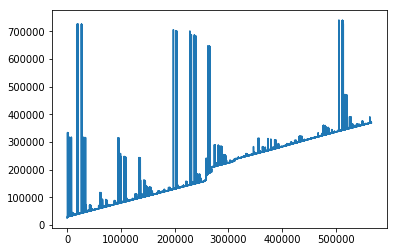

In [183]:
data2 = result_fit[0,:]
data2 = data2 * 1000
print data2.shape

elem2=mesh.elem[ind_lat[0]]
print elem2.shape


#d=data2[elem2[0:-2,:]]
#d=data2[elem2].mean(axis=1)

#print ind_lat.shape
print ind_lat[0][0]
print ind_lat[0][-2]
#d=data2[elem2[ind_lat[0][0:-1],:]]
plt.plot(elem2[:,2])
#plt.plot(1,data2[0,],'.r')
print elem2[0,:]
#d=data2

In [ ]:
#elem2=mesh.elem[ind_min:ind_max,]
#elem2=mesh.elem[]
#elem2.shape
#d=data2[elem2].mean(axis=1)
#ind_lat_full.shape

In [167]:
if arctic_plot:
    contours = [-2, 2, 0.4]
    contours = np.arange(contours[0], contours[1]+contours[2], contours[2])
    fig = plt.figure(figsize=(8,8), facecolor='w', edgecolor='k')
    #elem2=mesh.elem[ind_min:ind_max,]#[mesh.no_cyclic_elem,:]
    #d=data2[elem2].mean(axis=1)
    d=data2.mean(axis=1)
    k = [i for (i, val) in enumerate(d) if not np.isnan(val)]
    elem2=elem2[k,:]
    print 'ftriplot, number of dummy points:', len(d)-len(k)		
    map = Basemap(projection='nplaea',boundinglat=65,lon_0=0,resolution='l')
    x, y = map(mesh.x2, mesh.y2)
    #map.drawcoastlines()
    plabels=[False,False,False,False]
    mlabels=[True,True,True,True]    
    map.drawparallels(np.arange(-80.,81.,20.), labels=plabels)
    map.drawmeridians(np.arange(-180.,181.,20.),labels=mlabels) #[0,1,0,0]
    map.drawmapboundary(fill_color='0.9')
    map.fillcontinents(color='.5',lake_color='.7')
    eps=(contours.max()-contours.min())/100.
    data2[data2<=contours.min()]=contours.min()+eps
    data2[data2>=contours.max()]=contours.max()-eps
    im=plt.tricontourf(x, y, elem2, data2, levels=contours, cmap=cmap, norm=PiecewiseNorm(contours))
    label = runid+': Winter current velocity trend ('+str(years[0])+' to '+str(years[len(years)-1])+')'
    plt.title(label,y=1.05)
    cbar=map.colorbar(im,"bottom", size="5%", pad="5%")
    cbar.set_label(r'Winter Current velocity trend (mm s$^{-1}$ year$^{-1}$)')
    
    if export_plot == True:
        plt.savefig(savepath+'CurrentVel_trend_'+str(years[ind])+'.png', dpi = dpicnt, bbox_inches='tight') 
        
plt.show() 

IndexError: tuple index out of range

<Figure size 576x576 with 0 Axes>

In [ ]:
if global_plot:
    contours = [-2, 2, 0.4]
    contours = np.arange(contours[0], contours[1]+contours[2], contours[2])
    fig = plt.figure(num=1, figsize=(8, 8), dpi=dpicnt, facecolor='w', edgecolor='k')
    elem2=mesh.elem[mesh.no_cyclic_elem,:]
    d=data2[elem2].mean(axis=1)
    k = [i for (i, val) in enumerate(d) if not np.isnan(val)]
    elem2=elem2[k,:]
    print 'ftriplot, number of dummy points:', len(d)-len(k)    
    map = Basemap(projection='robin',lon_0=0) 
    x, y = map(mesh.x2, mesh.y2)
    map.drawmapboundary(fill_color='0.9')
    map.fillcontinents(color='.5',lake_color='.7')
    #map.drawcoastlines()
    mlabels=[False,False,False,False]
    plabels=[True,True,True,True]  
    map.drawparallels(np.arange(-90,90,30),labels=plabels) #[1,0,0,0]
    map.drawmeridians(np.arange(map.lonmin,map.lonmax+30,60),labels=mlabels) #[0,0,0,1]
    #eps=(contours.max()-contours.min())/50.
    #data2[data2<=contours.min()]=contours.min()+eps
    #data2[data2>=contours.max()]=contours.max()-eps
    im=plt.tricontourf(x, y, elem2, data2, levels=contours, cmap=cmap, norm=PiecewiseNorm(contours))
    label = runid+': Winter Current velocity trend ('+str(years[0])+' to '+str(years[len(years)-1])+')'
    plt.title(label)
    plt.clim(0,30)
    cbar=map.colorbar(im,"bottom", size="5%", pad="2%")
    cbar.set_label(r'Winter Current velocity trend (mm s$^{-1}$ year$^{-1}$)')
    
    
    if export_plot == True:
        plt.savefig(savepath+'CurrentVel_trend'+str(years[ind])+'_World.png', dpi = dpicnt, bbox_inches='tight')
        
plt.show()  